# EDA HMDA

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_db = pd.read_csv("https://www.dropbox.com/scl/fi/0yl5e0uwhh2mypl2htt7h/01_2022_HMDA_Filter.csv?rlkey=1z1qtm6h2h8rr1ubauk943la5&dl=1")

C:\Users\Forcessofnature\AppData\Local\Temp\ipykernel_30252\1978745115.py:1: DtypeWarning: Columns (22,23,24,26,27,28,29,30,31,32,33,38,43,44,46,77,78,79,80) have mixed types. Specify dtype option on import or set low_memory=False.
  df_db = pd.read_csv("https://www.dropbox.com/scl/fi/0yl5e0uwhh2mypl2htt7h/01_2022_HMDA_Filter.csv?rlkey=1z1qtm6h2h8rr1ubauk943la5&dl=1")


In [3]:
df_db.head()

,activity_year,lei,derived_msa_md,state_code,county_code,census_tract,conforming_loan_limit,derived_loan_product_type,derived_dwelling_category,derived_ethnicity,...,denial_reason_2,denial_reason_3,denial_reason_4,tract_population,tract_minority_population_percent,ffiec_msa_md_median_family_income,tract_to_msa_income_percentage,tract_owner_occupied_units,tract_one_to_four_family_homes,tract_median_age_of_housing_units
0,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835501e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Not Hispanic or Latino,...,NaN,NaN,NaN,3217,75.47,80900,71.0,998,1416,51
1,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4302,74.15,80900,91.0,560,1135,38
2,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,2197,93.90,80900,105.0,550,740,35
3,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4448,48.70,80900,133.0,1049,1588,62
4,2022,549300HMP6CQXPB0L958,18580,TX,48355.0,4.835500e+10,C,Conventional:First Lien,Single Family (1-4 Units):Site-Built,Hispanic or Latino,...,NaN,NaN,NaN,4083,85.43,80900,82.0,900,1375,64


## Breakdown of applications within each state

In [4]:
df_state_count = df_db.state_code.value_counts(dropna=False).to_frame().reset_index()

# scale the count to 1M
df_state_count['count'] = df_state_count['count'].astype('int') / 1000000

[Text(0.5, 0, 'States'),
 Text(0, 0.5, 'Applications in Millions'),
 Text(0.5, 1.0, 'State Application in Millions')]

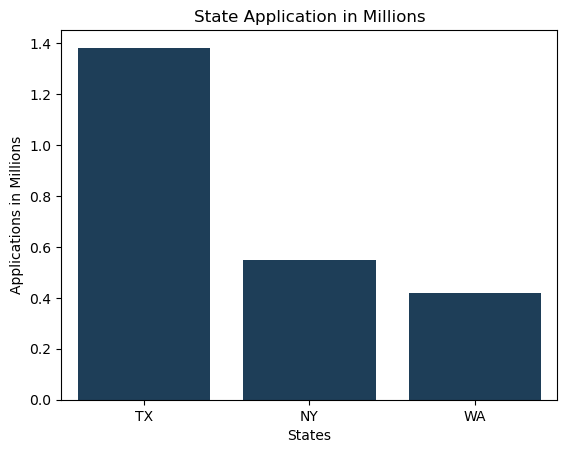

In [5]:
fig  = sns.barplot(df_state_count, x="state_code", y="count", color = '#143F62')
fig.set(xlabel ="States", ylabel = "Applications in Millions", title ='State Application in Millions')

### Dependent Variable of Interest

In [13]:
# Values:

#     1 - Loan originated
#     2 - Application approved but not accepted
#     3 - Application denied
#     4 - Application withdrawn by applicant
#     5 - File closed for incompleteness
#     6 - Purchased loan
#     7 - Preapproval request denied
#     8 - Preapproval request approved but not accepted


df_db.action_taken.value_counts(dropna=False)

action_taken
1    1183677
3     373293
4     334697
6     264196
5     116468
2      64596
8       7992
7       3373
Name: count, dtype: int64

### Independent Variables of Interest

In [6]:
df_db.derived_sex.value_counts(dropna=False)

derived_sex
Joint                748736
Male                 726536
Female               445635
Sex Not Available    427385
Name: count, dtype: int64

In [7]:
df_db.derived_loan_product_type.value_counts(dropna=False)



derived_loan_product_type
Conventional:First Lien          1597881
Conventional:Subordinate Lien     326682
FHA:First Lien                    265359
VA:First Lien                     152620
FSA/RHS:First Lien                  5031
FSA/RHS:Subordinate Lien             534
FHA:Subordinate Lien                 171
VA:Subordinate Lien                   14
Name: count, dtype: int64

In [8]:
df_db.derived_race.value_counts(dropna=False)

derived_race
White                                        1269053
Race Not Available                            641174
Asian                                         201288
Black or African American                     158279
Joint                                          52654
American Indian or Alaska Native               14797
Native Hawaiian or Other Pacific Islander       5373
2 or more minority races                        5099
Free Form Text Only                              575
Name: count, dtype: int64

In [9]:
df_db.derived_ethnicity.value_counts(dropna=False)

derived_ethnicity
Not Hispanic or Latino     1342574
Ethnicity Not Available     588776
Hispanic or Latino          346347
Joint                        69470
Free Form Text Only           1125
Name: count, dtype: int64

In [10]:
# Values:

#     1 - Preapproval requested
#     2 - Preapproval not requested

df_db.preapproval.value_counts(dropna=False)

preapproval
2    2291335
1      56957
Name: count, dtype: int64

In [11]:
# Values:

#     1 - Home purchase
#     2 - Home improvement
#     31 - Refinancing
#     32 - Cash-out refinancing
#     4 - Other purpose
#     5 - Not applicable


df_db.loan_purpose.value_counts(dropna=False)

loan_purpose
1     1296754
32     410023
31     283227
2      186532
4      158464
5       13292
Name: count, dtype: int64

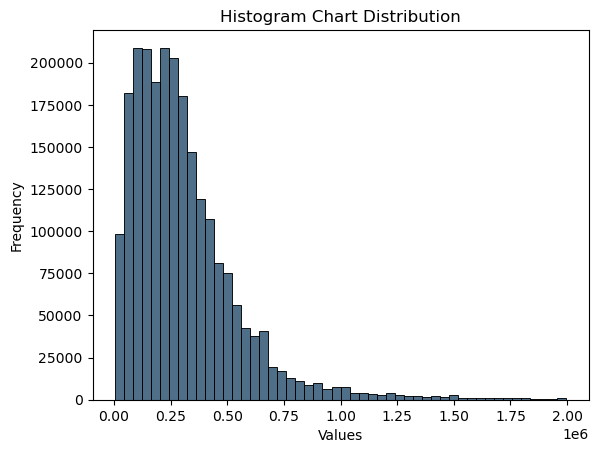

In [12]:
# Create a histogram using Seaborn
sns.histplot(df_db[df_db.loc[:,'loan_amount']<2000000].loan_amount,color = '#143F62', bins= 50)  # kde=False disables the kernel density estimation
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram Chart Distribution')
plt.show()

In [19]:
df_db.interest_rate.value_counts(dropna=False).head(25)

interest_rate
NaN       827781
Exempt     39926
4.75       27473
3.75       27014
3.25       25391
5.5        24157
5.25       23853
3.875      23687
5.625      23290
4.25       23195
5.25       22941
3.75       22364
4.5        22302
4.75       22277
4.875      21861
4.25       21517
5.5        21192
3.25       21149
3.875      20524
5.125      19655
3.5        19583
5.625      19181
4.5        19128
3.375      19110
5.75       18755
Name: count, dtype: int64

In [22]:
df_db.loan_term.value_counts(dropna=False).head(25)

loan_term
360       918502
360       530588
360.0     220666
180        92762
300        77630
180        59318
240        53095
240        49177
300        43509
NaN        40636
Exempt     39685
120        23668
180.0      23216
120        19849
480.0      15713
240.0      11853
36.0       11772
276        10125
300.0       7876
120.0       7034
276         5621
60          5242
12          5003
372.0       4564
60.0        3860
Name: count, dtype: int64

In [26]:
df_db.applicant_age.value_counts(dropna=False).head(25)

applicant_age
35-44    574687
25-34    455987
45-54    452565
55-64    315848
8888     224157
65-74    166034
>74       59607
<25       58447
8888      40960
Name: count, dtype: int64

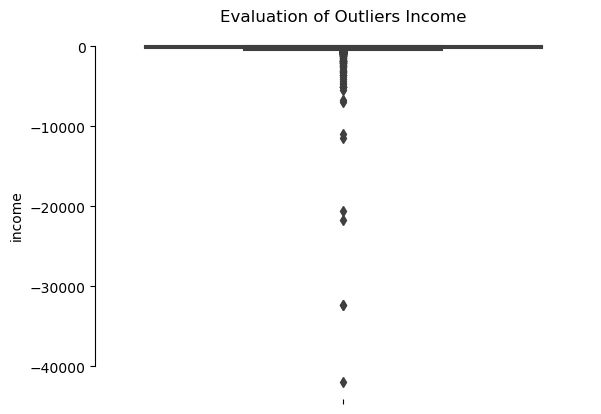

In [34]:
sns.boxplot( y="income",data=df_db[df_db.loc[:,'income']<0])
plt.title('Evaluation of Outliers Income')
sns.despine(trim=True)

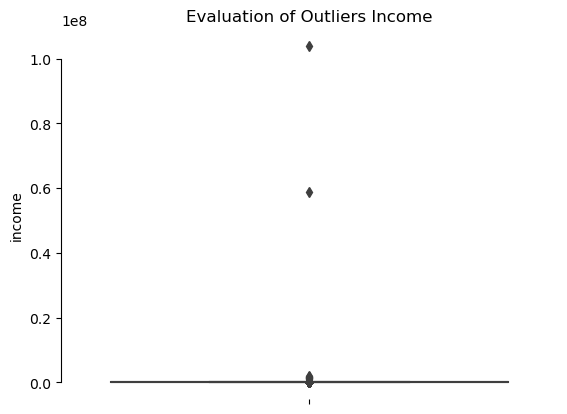

In [35]:
sns.boxplot( y="income",data=df_db[df_db.loc[:,'income']>0])
plt.title('Evaluation of Outliers Income')
sns.despine(trim=True)

In [36]:
df_db.debt_to_income_ratio.value_counts(dropna=False).head(25)

debt_to_income_ratio
NaN         808367
20%-<30%    223743
30%-<36%    222979
50%-60%     143935
>60%        105272
<20%         90372
44           63132
42           60433
49           59540
43           55039
41           54470
40           51893
39           50524
45           48528
38           47467
48           46440
37           45777
47           43607
46           43550
36           43275
Exempt       39949
Name: count, dtype: int64